#Dependancies

In [1]:
!pip install mtcnn
!pip install dlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 31.7 MB/s eta 0:00:00


In [2]:
from __future__ import print_function
import cv2 as cv
from cv2 import VideoCapture
from google.colab.patches import cv2_imshow
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import argparse
import imutils
from imutils.video import FileVideoStream
import time
import dlib
import os
from google.colab import files

#Detection algorithms

In [3]:
def haars_cascade(gray, frame, detector):
  #face detection
  results = detector.detectMultiScale(gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags = cv.CASCADE_SCALE_IMAGE)

  # drawing bounding boxes on images
  # plot each box
  for result in results:
    # get coordinates
    x, y, width, height = result
    # draw the box
    cv.rectangle(frame, (x, y), (x+width, y+height), (0, 255, 0), 2)
  return frame

In [4]:
def mtcnn(frame, detector):
  results = detector.detect_faces(frame)# result

  # drawing bounding boxes on images
  # plot each box
  for result in results:
    # get coordinates
    x, y, width, height = result['box']
    # draw the box
    cv.rectangle(frame, (x, y), (x+width, y+height), (0, 255, 0), 2)
  return frame

In [5]:
def process_video(path, detector, type):
  # create a video reader object
  vs = cv.VideoCapture(path)
  if not vs.isOpened:
    print('--(!)Error opening video capture')
    return None

  # get the width, height, and frame rate of the video
  width = int(vs.get(cv.CAP_PROP_FRAME_WIDTH))
  height = int(vs.get(cv.CAP_PROP_FRAME_HEIGHT))
  rate = vs.get(cv.CAP_PROP_FPS)
  print('width: {}, height: {}, rate: {}'.format(width, height, rate))

  # create a video writer object
  output = cv.VideoWriter(
        "output.avi", cv.VideoWriter_fourcc(*'MJPG'), rate, (width, height))
  # start timing algorithm
  start = time.time()
  # loop to get each frame
  while vs.isOpened():
    # grab the frame from the file video stream,
    #resize it, and convert it to grayscale
    ret, frame = vs.read()
    if not ret:
      print('Error, frame could not be read...')
      break

    # processing the frame
    frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    gray = cv.cvtColor(frame, cv.COLOR_RGB2GRAY)
    gray = cv.equalizeHist(gray)

    # detecting faces based off type parameter
    if type == 0:
      results = haars_cascade(gray, frame, detector)
    if type == 1:
      results = mtcnn(frame, detector)

    # converting resulting frame with faces detected to RGB
    results = cv.cvtColor(results, cv.COLOR_BGR2RGB)
    # saving the frame to the output video
    output.write(results)

  # end time of algorithm
  end = time.time()
  # data cleanup
  cv.destroyAllWindows()
  vs.release()
  output.release()
  total = end - start
  return total

In [6]:
def render_realtime(detector, type):
  # create a video reader object
  vs = cv.VideoCapture(0)
  if not vs.isOpened:
    print('--(!)Error opening video capture')
    return None

  # looping through real-time video data
  while True:
    ret, frame = vs.read()
    if frame == None:
        print('--(!) No captured frame -- Break!')
        break

    # processing frame
    frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    gray = cv.cvtColor(frame, cv.COLOR_RGB2GRAY)
    gray = cv.equalizeHist(gray)

    # detecing faces based off type parameter
    if type == 0:
      results = haars_cascade(gray, frame, detector)
    if type == 1:
      results = mtcnn(frame, detector)

    # converting resulting frame with faces detected to RGB
    results = cv.cvtColor(results, cv.COLOR_BGR2RGB)
    # showing result in real-time
    cv2_imshow(results)
    # to stop algorithm, press esc key
    k = cv.waitKey(30) & 0xff
    if k == 27:
        break

  # data cleanup
  cv.destroyAllWindows()
  vs.release()

#Image data preprocessing

In [7]:
path = 'img1.jpg'
img = cv.imread(path)
I = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
I = cv.equalizeHist(I)

#Image detection

Total time =  0.3007321357727051


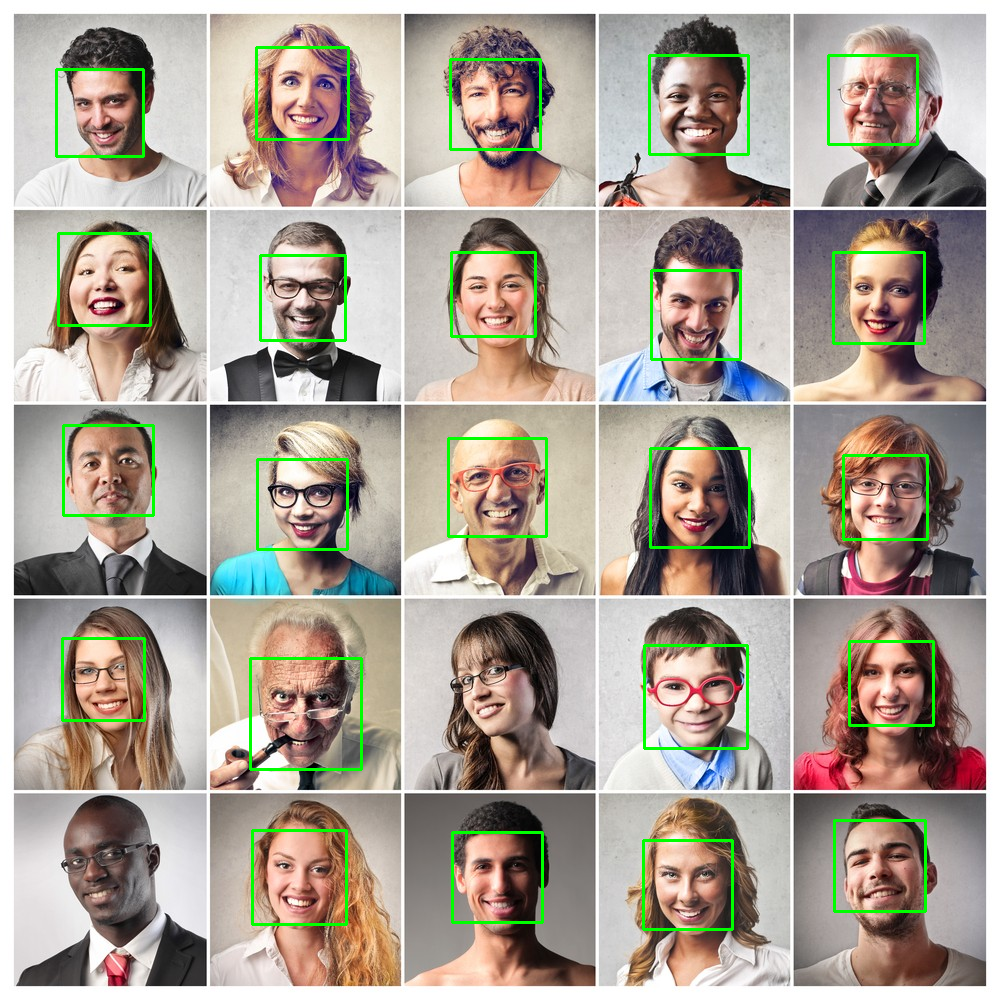

In [8]:
classifier = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
start = time.time()
result = haars_cascade(I, img, classifier)
end = time.time()
print('Total time = ', end-start)
cv2_imshow(result)

3/3 [==============================] - 0s 35ms/step
Total time =  9.58523154258728


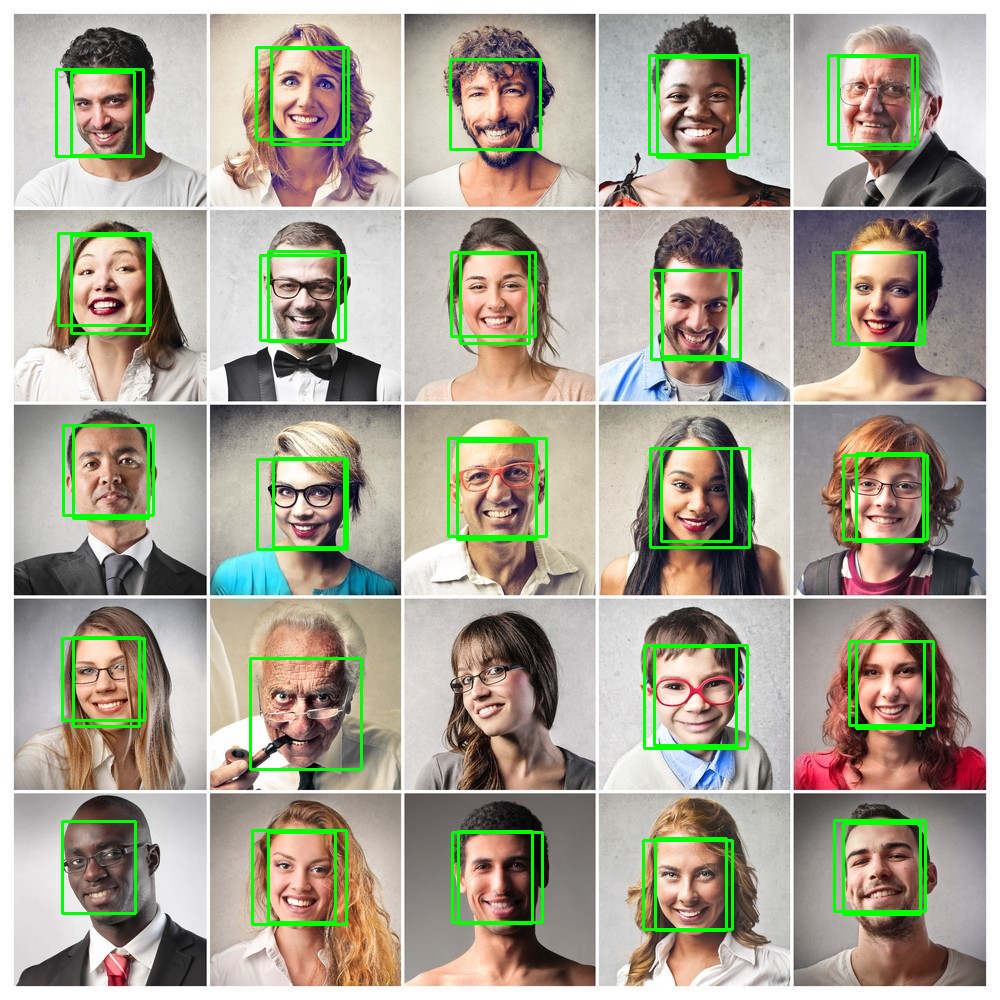

In [9]:
detector = MTCNN()
start = time.time()
result = mtcnn(img, detector)
end = time.time()
print('Total time = ', end-start)
cv2_imshow(result)

#Video detection

In [ ]:
path = 'hangover.mp4'
classifier = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
tot_time = process_haars_video(path, classifier, 0)
print('Total time = ', tot_time)

width: 640, height: 360, rate: 23.976023976023978
Error, frame could not be read...
Total time =  125.02514123916626


In [ ]:
path = 'hangover.mp4'
detector = MTCNN()
tot_time = process_video(path, detector, 1)
print('Total time = ', tot_time)

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 4ms/step
Error, frame could not be read...
Total time =  2470.3542127609253


#Real-time detection

In [ ]:
classifier = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
render_realtime(classifier, 0)

--(!) No captured frame -- Break!


In [ ]:
detector = detector = MTCNN()
render_realtime(detector, 1)

#Test code (not used)

In [ ]:
def draw_boundingbox(img, result_list):
  # load the image
  data = plt.imread(img)
  # plot the image
  plt.imshow(data)
  # get the context for drawing boxes
  ax = plt.gca()
  # plot each box
  for result in result_list:
    print(result)
    # get coordinates
    x, y, width, height = result['box']
    # create the shape
    rect = plt.Rectangle((x, y), width, height, fill=False, color='green')
    # draw the box
    ax.add_patch(rect)
    # show the plot
  plt.show()

In [ ]:
def haars_cascade_video(frame):
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frame_gray = cv.equalizeHist(frame_gray)
    #-- Detect faces
    faces = face_cascade.detectMultiScale(frame_gray)
    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        frame = cv.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
        faceROI = frame_gray[y:y+h,x:x+w]
        #-- In each face, detect eyes
        eyes = eyes_cascade.detectMultiScale(faceROI)
        for (x2,y2,w2,h2) in eyes:
            eye_center = (x + x2 + w2//2, y + y2 + h2//2)
            radius = int(round((w2 + h2)*0.25))
            frame = cv.circle(frame, eye_center, radius, (255, 0, 0 ), 4)
    cv.imshow('Capture - Face detection', frame)
parser = argparse.ArgumentParser(description='Code for Cascade Classifier tutorial.')
parser.add_argument('--face_cascade', help='Path to face cascade.', default='data/haarcascades/haarcascade_frontalface_alt.xml')
parser.add_argument('--eyes_cascade', help='Path to eyes cascade.', default='data/haarcascades/haarcascade_eye_tree_eyeglasses.xml')
parser.add_argument('--camera', help='Camera divide number.', type=int, default=0)
args = parser.parse_args()
face_cascade_name = args.face_cascade
eyes_cascade_name = args.eyes_cascade
face_cascade = cv.CascadeClassifier()
eyes_cascade = cv.CascadeClassifier()
#-- 1. Load the cascades
if not face_cascade.load(cv.samples.findFile(face_cascade_name)):
    print('--(!)Error loading face cascade')
    exit(0)
if not eyes_cascade.load(cv.samples.findFile(eyes_cascade_name)):
    print('--(!)Error loading eyes cascade')
    exit(0)
camera_device = args.camera
#-- 2. Read the video stream
cap = cv.VideoCapture(camera_device)
if not cap.isOpened:
    print('--(!)Error opening video capture')
    exit(0)
while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break
    haars_cascade_video(frame)
    if cv.waitKey(10) == 27:
        break

usage: colab_kernel_launcher.py [-h] [--face_cascade FACE_CASCADE] [--eyes_cascade EYES_CASCADE]
                                [--camera CAMERA]
colab_kernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-195e7815-61e9-425c-a22a-4efe755cedcb.json


SystemExit: ignored

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
def haars_cascade(img, img_path, classifier):
  #face detection
  results = classifier.detectMultiScale(img,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags = cv.CASCADE_SCALE_IMAGE)

  # drawing bounding boxes on images
  # load the image
  data = plt.imread(img_path)
  # plot the image
  plt.imshow(data)
  # get the context for drawing boxes
  ax = plt.gca()
  # plot each box
  for result in results:
    # get coordinates
    x, y, width, height = result
    # create the shape
    rect = plt.Rectangle((x, y), width, height, fill=False, color='green')
    # draw the box
    ax.add_patch(rect)
    # show the plot
  plt.show()
  return results

In [ ]:
def mtcnn(img, img_path, detector):
  results = detector.detect_faces(img)# result

  # drawing bounding boxes on images
  # load the image
  data = plt.imread(img_path)
  # plot the image
  plt.imshow(data)
  # get the context for drawing boxes
  ax = plt.gca()
  # plot each box
  for result in results:
    # get coordinates
    x, y, width, height = result['box']
    # create the shape
    rect = plt.Rectangle((x, y), width, height, fill=False, color='green')
    # draw the box
    ax.add_patch(rect)
    # show the plot
  plt.show()
  return results